In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SequentialFeatureSelector, VarianceThreshold, RFE, RFECV
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import HuberRegressor
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("df_s.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     776 non-null    int64  
 1   CountryofOrigin_Guatemala      776 non-null    float64
 2   CountryofOrigin_Colombia       776 non-null    float64
 3   CountryofOrigin_Kenya          776 non-null    float64
 4   CountryofOrigin_Taiwan         776 non-null    float64
 5   CountryofOrigin_Other          776 non-null    float64
 6   CountryofOrigin_Nicaragua      776 non-null    float64
 7   CountryofOrigin_Honduras       776 non-null    float64
 8   CountryofOrigin_Tanzania       776 non-null    float64
 9   CountryofOrigin_Mexico         776 non-null    float64
 10  CountryofOrigin_Brazil         776 non-null    float64
 11  CountryofOrigin_United States  776 non-null    float64
 12  CountryofOrigin_Costa Rica     776 non-null    flo

In [3]:
sel = VarianceThreshold()
X = pd.DataFrame(sel.fit_transform(df), columns=df.columns.values[sel.get_support()])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     776 non-null    float64
 1   CountryofOrigin_Guatemala      776 non-null    float64
 2   CountryofOrigin_Colombia       776 non-null    float64
 3   CountryofOrigin_Kenya          776 non-null    float64
 4   CountryofOrigin_Taiwan         776 non-null    float64
 5   CountryofOrigin_Other          776 non-null    float64
 6   CountryofOrigin_Nicaragua      776 non-null    float64
 7   CountryofOrigin_Honduras       776 non-null    float64
 8   CountryofOrigin_Tanzania       776 non-null    float64
 9   CountryofOrigin_Mexico         776 non-null    float64
 10  CountryofOrigin_Brazil         776 non-null    float64
 11  CountryofOrigin_United States  776 non-null    float64
 12  CountryofOrigin_Costa Rica     776 non-null    flo

In [4]:
X3=X.drop(X.columns[0], axis=1)

X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CountryofOrigin_Guatemala      776 non-null    float64
 1   CountryofOrigin_Colombia       776 non-null    float64
 2   CountryofOrigin_Kenya          776 non-null    float64
 3   CountryofOrigin_Taiwan         776 non-null    float64
 4   CountryofOrigin_Other          776 non-null    float64
 5   CountryofOrigin_Nicaragua      776 non-null    float64
 6   CountryofOrigin_Honduras       776 non-null    float64
 7   CountryofOrigin_Tanzania       776 non-null    float64
 8   CountryofOrigin_Mexico         776 non-null    float64
 9   CountryofOrigin_Brazil         776 non-null    float64
 10  CountryofOrigin_United States  776 non-null    float64
 11  CountryofOrigin_Costa Rica     776 non-null    float64
 12  CountryofOrigin_Thailand       776 non-null    flo

In [5]:
hr = HuberRegressor(epsilon=1.1, fit_intercept=False, max_iter = 3000)

In [6]:
%%time
selector = SequentialFeatureSelector(hr, n_features_to_select=10, cv=10) #Backwardと共通関数で、Defaultがfoward

X_new = pd.DataFrame(selector.fit_transform(X3, X3['TotalCupPoints']),
                     columns=X3.columns.values[selector.get_support()])
result = pd.DataFrame(selector.get_support(), index=X3.columns.values, columns=['False: dropped'])
print(result)

                               False: dropped
CountryofOrigin_Guatemala               False
CountryofOrigin_Colombia                 True
CountryofOrigin_Kenya                   False
CountryofOrigin_Taiwan                  False
CountryofOrigin_Other                   False
CountryofOrigin_Nicaragua               False
CountryofOrigin_Honduras                False
CountryofOrigin_Tanzania                False
CountryofOrigin_Mexico                  False
CountryofOrigin_Brazil                  False
CountryofOrigin_United States           False
CountryofOrigin_Costa Rica              False
CountryofOrigin_Thailand                False
CountryofOrigin_El Salvador             False
CountryofOrigin_Ethiopia                False
CountryofOrigin_Uganda                  False
CountryofOrigin_Indonesia               False
CountryofOrigin_China                   False
CountryofOrigin_Vietnam                 False
CountryofOrigin_Myanmar                 False
CountryofOrigin_Malawi            

In [7]:
%%time
selector = SequentialFeatureSelector(hr, n_features_to_select=10, direction='backward', cv=10) #Backwardと共通関数で、Defaultがfoward

X_new = pd.DataFrame(selector.fit_transform(X3, X3['TotalCupPoints']),
                     columns=X3.columns.values[selector.get_support()])
result = pd.DataFrame(selector.get_support(), index=X3.columns.values, columns=['False: dropped'])
print(result)

                               False: dropped
CountryofOrigin_Guatemala               False
CountryofOrigin_Colombia                False
CountryofOrigin_Kenya                   False
CountryofOrigin_Taiwan                  False
CountryofOrigin_Other                   False
CountryofOrigin_Nicaragua               False
CountryofOrigin_Honduras                False
CountryofOrigin_Tanzania                False
CountryofOrigin_Mexico                  False
CountryofOrigin_Brazil                  False
CountryofOrigin_United States           False
CountryofOrigin_Costa Rica               True
CountryofOrigin_Thailand                False
CountryofOrigin_El Salvador             False
CountryofOrigin_Ethiopia                 True
CountryofOrigin_Uganda                  False
CountryofOrigin_Indonesia               False
CountryofOrigin_China                   False
CountryofOrigin_Vietnam                 False
CountryofOrigin_Myanmar                 False
CountryofOrigin_Malawi            

In [8]:
print(selector.get_support())
print(selector.n_features_to_select)

[False False False False False False False False False False False  True
 False False  True False False False False False False False False False
 False  True False False  True  True False False False False False False
 False False  True  True False False False False False False False False
  True False False False  True False False False False  True]
10


In [16]:
%%time
selector = RFE(rf, n_features_to_select=10)

X0_new = pd.DataFrame(selector.fit_transform(X3, X3['TotalCupPoints']),
                     columns=X3.columns.values[selector.get_support()])
result = pd.DataFrame(selector.get_support(), index=X3.columns.values, columns=['False: dropped'])
result['ranking'] = selector.ranking_
print(result)

                               False: dropped  ranking
CountryofOrigin_Guatemala               False       30
CountryofOrigin_Colombia                False       29
CountryofOrigin_Kenya                   False       39
CountryofOrigin_Taiwan                  False       18
CountryofOrigin_Other                   False       20
CountryofOrigin_Nicaragua               False        2
CountryofOrigin_Honduras                False       33
CountryofOrigin_Tanzania                False       42
CountryofOrigin_Mexico                  False        8
CountryofOrigin_Brazil                  False       32
CountryofOrigin_United States           False       21
CountryofOrigin_Costa Rica              False       19
CountryofOrigin_Thailand                False       44
CountryofOrigin_El Salvador             False       31
CountryofOrigin_Ethiopia                False       13
CountryofOrigin_Uganda                  False       34
CountryofOrigin_Indonesia               False       26
CountryofO

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf = RandomForestRegressor(n_estimators=1000, random_state=0)

In [12]:
%%time
in_features_to_select = 5
selector1 = RFECV(rf, min_features_to_select=in_features_to_select, cv=10)

X1_new = pd.DataFrame(selector1.fit_transform(X3, X3['TotalCupPoints']),
                     columns=X3.columns.values[selector1.get_support()])
result = pd.DataFrame(selector1.get_support(), index=X3.columns.values, columns=['False: dropped'])
result['ranking'] = selector1.ranking_
print(result)

                               False: dropped  ranking
CountryofOrigin_Guatemala               False       33
CountryofOrigin_Colombia                False       32
CountryofOrigin_Kenya                   False       42
CountryofOrigin_Taiwan                  False       21
CountryofOrigin_Other                   False       23
CountryofOrigin_Nicaragua               False        5
CountryofOrigin_Honduras                False       36
CountryofOrigin_Tanzania                False       45
CountryofOrigin_Mexico                  False       11
CountryofOrigin_Brazil                  False       35
CountryofOrigin_United States           False       24
CountryofOrigin_Costa Rica              False       22
CountryofOrigin_Thailand                False       47
CountryofOrigin_El Salvador             False       34
CountryofOrigin_Ethiopia                False       16
CountryofOrigin_Uganda                  False       37
CountryofOrigin_Indonesia               False       29
CountryofO

In [13]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.family'] = 'IPAexGothic'
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(20, 10)})

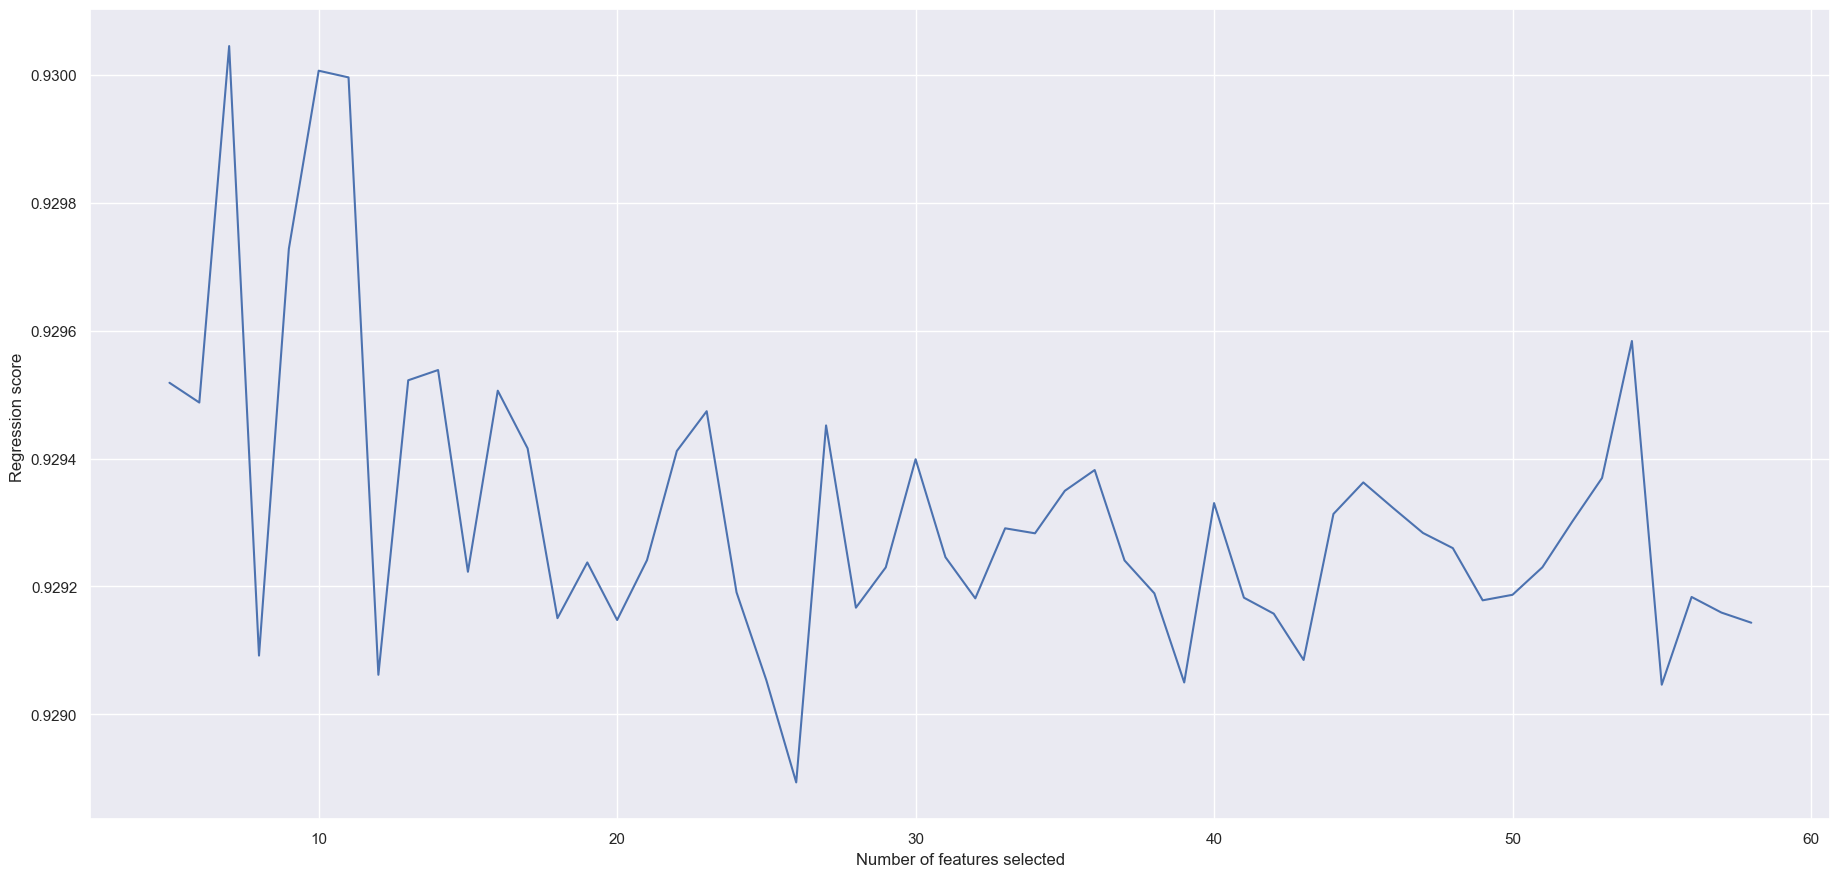

In [19]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Regression score ")
plt.plot(range(in_features_to_select,
               len(selector1.cv_results_["mean_test_score"]) + in_features_to_select),
         selector1.cv_results_["mean_test_score"])
plt.show()

In [ ]:
%%time
efs1 = EFS(rf, min_features=8, max_features=11, print_progress = True, n_jobs = -1)
efs1 = efs1.fit(X3, X3['TotalCupPoints'])

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset:', efs1.best_feature_names_)

In [ ]:
df2 = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df2.sort_values('avg_score', inplace=True, ascending=False)

df2

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=1)

df2.set_index('feature_names', inplace=True) # 一番わかりやすい特徴名をindexに設定(グラフ出力用)
df2.head(10).sort_values('avg_score', ascending=True)['avg_score'].plot.barh(ax=ax, grid=True)
ax.set_xlim(df2.head(10)['avg_score'].min() * 0.95, df2.head(10)['avg_score'].max() * 1.05)
plt.show()